<a href="https://colab.research.google.com/github/Arka1212/Live-Class-Monitoring-System-Face-Emotion-Recognition/blob/main/Live_Class_Monitoring_System_(Face_Emotion_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Live Class Monitoring System (Face Emotion Recognition)**

## **Project Introduction**
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. 

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance. While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

## **Problem Statement**
The problem statement focuses on solving the above-mentioned challenge by applying deep learning algorithms to live video data. The solution to this problem is by recognizing facial emotions. This is a few shot learning live face emotion detection system. The model should be able to real-time identify the emotions of students in a live class.

## **Dataset Link**
Dataset: https://www.kaggle.com/msambare/fer2013


**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**
**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [41]:
# Importing basic libraries.
import numpy as np                   
import pandas as pd                   
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print(tf.__version__)
import warnings                                                                                
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

2.8.0


Only some of the basic libraries are imported in order to get started & rest all the necessary libraries will be imported as and when required.

### **Loading & inspecting the dataset**

In [11]:
# Mounting the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Downloading the dataset.
filename = '/content/drive/MyDrive/Capstone Projects/Deep Learning/Live Class Monitoring System (Face Emotion Recognition)/Face_Emotion_Recognition_Dataset.zip'

In [16]:
# Unzipping the downloaded data as its in zip format.
import zipfile
zip_ref = zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()

Seems that the dataset is already splitted into train and test set.

In [40]:
# Getting the class names programatically.
import pathlib                                  # 'Pathlib' module in Python provides various classes representing file system paths.

data_dir = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
# Creates a list of class names from the sub-directories.

print(class_names)
print(len(class_names))

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
7


* So, there are total 7 classes in the dataset.
* 7 classes are as follows: **angry**, **disgust**, **fear**, **happy**, **neutral**, **sad**, **surprise**
* Each of these classes represents different human emotions.

In [19]:
# Setting up train and test dataset.
train_data = '/content/train'
test_data = '/content/test'  

In [35]:
# Walking into the training dataset and listing the number of files for each class.
import os
print('TRAINING DATA:\n')
for dirpath, dirnames, filenames in os.walk(train_data):
  print(f'There are {len(filenames)} images in {dirpath}.')

TRAINING DATA:

There are 0 images in /content/train.
There are 3171 images in /content/train/surprise.
There are 4965 images in /content/train/neutral.
There are 4097 images in /content/train/fear.
There are 436 images in /content/train/disgust.
There are 3995 images in /content/train/angry.
There are 4830 images in /content/train/sad.
There are 7215 images in /content/train/happy.


In [36]:
# Walking into the testing dataset and listing the number of files for each class.
print('TESTING DATA:\n')
for dirpath, dirnames, filenames in os.walk(test_data):
  print(f'There are {len(filenames)} images in {dirpath}.')

TESTING DATA:

There are 0 images in /content/test.
There are 831 images in /content/test/surprise.
There are 1233 images in /content/test/neutral.
There are 1024 images in /content/test/fear.
There are 111 images in /content/test/disgust.
There are 958 images in /content/test/angry.
There are 1247 images in /content/test/sad.
There are 1774 images in /content/test/happy.


### **Visualising the images of different classes**

In [85]:
# Creating a function to view random images from the dataset.
import matplotlib.image as mpimg                                 # Used to visualize image format data.
import random                                                    # To get random data.

def view_random_images(target_dir, target_class):
  target_folder = target_dir +'/'+ target_class

  # Getting a random image.
  random_image = random.sample(os.listdir(target_folder),1)
  print(f'Image number: {random_image}')
  
  # Reading the image and plotting it using matplotlib.
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class.upper(),fontsize = 20)
  plt.axis('off')
  
  # Showing the shape of the image.
  print(f'Image shape : {img.shape}')

  return img

Image number: ['Training_43352525.jpg']
Image shape : (48, 48)


array([[  0,   0,   1, ...,  72,  69,  67],
       [  0,   1,   0, ...,  75,  75,  67],
       [  0,   4,   0, ...,  77,  77,  68],
       ...,
       [  0,   0,   2, ...,  51,  67, 123],
       [  0,   0,   1, ...,  53,  84, 136],
       [  0,   1,   0, ...,  80, 101, 134]], dtype=uint8)

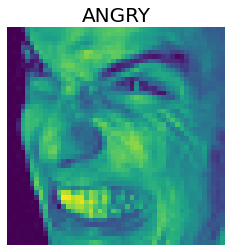

In [57]:
# Viewing random image of 'angry' class.
view_random_images(target_dir = train_data,
                   target_class = 'angry')

Image number: ['Training_5420780.jpg']
Image shape : (48, 48)


array([[178, 163, 114, ...,  50,  56,  65],
       [175, 181, 103, ...,  45,  50,  55],
       [178, 186,  78, ...,  36,  46,  49],
       ...,
       [194, 192, 193, ..., 121, 139, 153],
       [195, 193, 194, ..., 128, 140, 150],
       [197, 195, 195, ..., 130, 136, 155]], dtype=uint8)

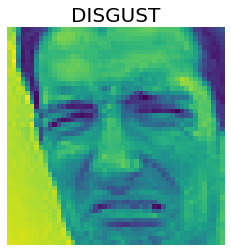

In [65]:
# Viewing random image of 'disgust' class.
view_random_images(target_dir = train_data,
                   target_class = 'disgust')

Image number: ['Training_7323165.jpg']
Image shape : (48, 48)


array([[235, 237, 232, ..., 237, 237, 237],
       [238, 235, 229, ..., 237, 237, 236],
       [234, 237, 233, ..., 236, 238, 236],
       ...,
       [ 72,  72,  71, ...,  74,  76,  74],
       [ 67,  71,  71, ...,  76,  75,  75],
       [ 71,  66,  68, ...,  75,  73,  73]], dtype=uint8)

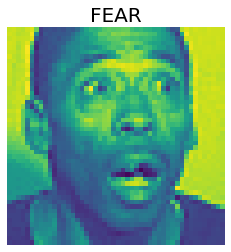

In [71]:
# Viewing random image of 'fear' class.
view_random_images(target_dir = train_data,
                   target_class = 'fear')

Image number: ['Training_11270728.jpg']
Image shape : (48, 48)


array([[ 85, 104, 124, ..., 156, 206, 215],
       [ 95, 108, 125, ..., 147, 197, 217],
       [104, 116, 132, ..., 140, 184, 211],
       ...,
       [100, 145, 150, ..., 163, 189, 217],
       [ 80, 106, 159, ..., 164, 181, 215],
       [ 72,  86, 127, ..., 164, 176, 212]], dtype=uint8)

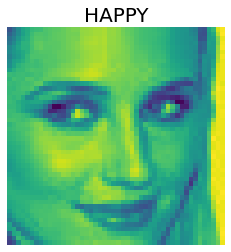

In [73]:
# Viewing random image of 'happy' class.
view_random_images(target_dir = train_data,
                   target_class = 'happy')

Image number: ['Training_15203635.jpg']
Image shape : (48, 48)


array([[ 40,  38,  42, ..., 169, 170, 170],
       [ 41,  45,  49, ..., 175, 172, 174],
       [ 52,  58,  61, ..., 174, 178, 171],
       ...,
       [  2,   3,   1, ...,   3,   3,   3],
       [  2,   6,   4, ...,   3,   3,   3],
       [  4,   2,   1, ...,   3,   3,   3]], dtype=uint8)

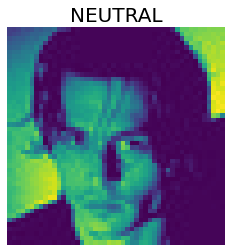

In [76]:
# Viewing random image of 'neutral' class.
view_random_images(target_dir = train_data,
                   target_class = 'neutral')

Image number: ['Training_32591988.jpg']
Image shape : (48, 48)


array([[254, 254, 254, ..., 183, 165, 124],
       [255, 255, 254, ..., 155, 163, 159],
       [252, 254, 255, ..., 139, 141, 151],
       ...,
       [149, 155, 163, ..., 123, 123, 117],
       [153, 152, 157, ..., 115, 112, 112],
       [150, 149, 155, ..., 108, 104, 110]], dtype=uint8)

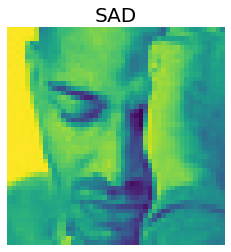

In [81]:
# Viewing random image of 'sad' class.
view_random_images(target_dir = train_data,
                   target_class = 'sad')

Image number: ['Training_85488219.jpg']
Image shape : (48, 48)


array([[ 47,  38,  27, ..., 174, 168, 146],
       [ 48,  33,  18, ..., 172, 172, 157],
       [ 35,  23,  25, ..., 173, 169, 169],
       ...,
       [ 27,  14,  12, ...,  13,  13,  18],
       [ 27,  15,  13, ...,  11,   5,  12],
       [ 29,  13,  16, ...,   4,   8,   8]], dtype=uint8)

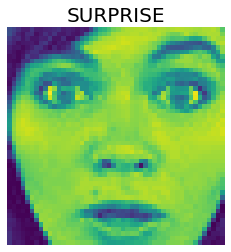

In [84]:
# Viewing random image of 'surprise' class.
view_random_images(target_dir = train_data,
                   target_class = 'surprise')

* The image arrays are not scaled, so need to perform some pre-processing in order to normalise the arrays values.
* The images are not in RGB colur mode, so need to perform some pre-processing to change it into RGB format as neural network only accepts RGB colur mode.

### **Pre-processing the data**